***
## Table of Contents
<br>
    <ol>
        <h2><a href='#1' style="text-decoration : none; color : #000000;">1. HTTP</a></h2>
        <ul>
            <a href='#1.A' style="text-decoration : none; color : #000000;"><h3>A. Loading Data </h3></a>
        </ul>
        <ul>
            <a href='#1.B' style="text-decoration : none; color : #000000;"><h3>B. Feature Selection </h3></a>
            </ul>
        <ul>
            <a href='#1.C' style="text-decoration : none; color : #000000;"><h3>C. Splitting Training and Test Data For Selected Features </h3></a>
           </ul>
        <ul>
            <a href='#1.D' style="text-decoration : none; color : #000000;"><h3>D. Classification using different methods </h3></a>
            </ul>
            <ul>
            <a href='#1.E' style="text-decoration : none; color : #000000;"><h3>E. Results </h3></a>
            </ul>
     </ol>
     <br>
      <ol>
        <h2><a href='#2' style="text-decoration : none; color : #000000;">2. HTTP with PCA</a></h2>
        <ul><a href='#2.A' style="text-decoration : none; color : #000000;"><h3>A. Classification using different methods </h3></a>
            </ul>
            <ul>
            <a href='#2.B' style="text-decoration : none; color : #000000;"><h3>B. Results </h3></a>
            </ul>
            <ul>
             <a href='#2.C' style="text-decoration : none; color : #000000;"><h3> C. % variance eplained by selected features</h3> </a> </ul>
     </ol>
<br>

<br>
    <ol>
        <h2><a href='#3' style="text-decoration : none; color : #000000;">3. HTTPS</a></h2>
        <ul>
            <a href='#3.A' style="text-decoration : none; color : #000000;"><h3>A. Loading Data </h3></a>
        </ul>
        <ul>
            <a href='#3.B' style="text-decoration : none; color : #000000;"><h3>B. Feature Selection </h3></a>
            </ul>
        <ul>
            <a href='#3.C' style="text-decoration : none; color : #000000;"><h3>C. Splitting Training and Test Data For Selected Features </h3></a>
           </ul>
        <ul>
            <a href='#3.D' style="text-decoration : none; color : #000000;"><h3>D. Classification using different methods </h3></a>
            </ul>
            <ul>
            <a href='#3.E' style="text-decoration : none; color : #000000;"><h3>E. Results </h3></a>
            </ul>
     </ol>
     <br>
      <ol>
        <h2><a href='#4' style="text-decoration : none; color : #000000;">4. HTTPS with PCA</a></h2>
        <ul><a href='#4.A' style="text-decoration : none; color : #000000;"><h3>A. Classification using different methods </h3></a>
            </ul>
            <ul>
            <a href='#4.B' style="text-decoration : none; color : #000000;"><h3>B. Results </h3></a>
            </ul>
            <ul>
             <a href='#4.C' style="text-decoration : none; color : #000000;"><h3> C. % variance eplained by selected features</h3> </a> </ul>
     </ol>
<br>

In [7]:
import pandas as pd
import numpy as np
import os
import json
from pandas.io.json import json_normalize
from IPython.display import display,clear_output,HTML
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from tabulate import tabulate

import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',305)

from sklearn.feature_selection import SelectKBest,chi2,RFE,RFECV,f_regression,SelectFromModel
from sklearn.linear_model import LogisticRegression,RandomizedLasso,LinearRegression, Ridge,Lasso
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold,GridSearchCV,train_test_split,cross_val_score

from sklearn.preprocessing import MinMaxScaler,StandardScaler,binarize
from sklearn.ensemble import RandomForestRegressor
from minepy import MINE
from sklearn import metrics

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,accuracy_score,auc,roc_curve,recall_score
from sklearn import metrics
from pandas_ml import ConfusionMatrix


from imblearn.over_sampling import SMOTE

In [8]:
### Function get_params takes as input a grid search model and prints out the best parameters for the model and 
### prints the best accuracy of the model
def get_params(grid,model_name=''):
    print("Best Parameters are :")
    display(pd.DataFrame.from_dict(grid.best_params_, orient='index').reset_index().transpose())

### The function takes as input the model, X and Y data to generate the confusion matrix  
def get_cm(model,a,b):
    y_pred=model.predict(a)
    cm=ConfusionMatrix(b,y_pred)
    return cm
 
### The get accuracy plot takes as input a dataframe and a string for the title of the plot and displays a plot
### The function is primarily for plotting of accuracies for various classifiers for the same split.
def get_accuracy_plot(data,title=''):
    plt.figure(figsize=(12,8))
    plt.plot(data['accuracy'].values, '--o')
    plt.ylabel('Accuracy', fontsize=20)
    plt.xlabel('Classifier', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.tick_params(axis='both', which='minor', labelsize=12)
    plt.xlim([0, 9])
    plt.title(title,size=18,y=1.05)
    plt.xticks(np.arange(10),data.index.get_values(),rotation=90)
    plt.legend(loc='upper right', fontsize=18)
    plt.show()

### Function grid takes as input an estimator, X_train,Y_Train,X_test and Y_test and a string represetning the name of the model
### We perform StratifiedKFold cross validation and grid search to hypertune the parameters of the model     
def grid(kernel,params,x,y,x_test,y_test,model_name=''):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    grid_search=GridSearchCV(estimator=kernel,param_grid=parameters,scoring='accuracy',cv=kfold,n_jobs=3,verbose=True)
    grid_search.fit(x,y)
    get_params(grid_search,model_name)
    acc_train=accuracy_score(y,grid_search.predict(x))
    print("Accuracy of the ",model_name," model for the training data is:",acc_train)
    print("\nConfusion Matrix for Training data is:")
    cm_train=get_cm(grid_search,x,y)
    display(cm_train)
    acc_test=accuracy_score(y_test,grid_search.predict(x_test))
    print("Accuracy of the ",model_name," model for test data is:",acc_test)
    print("\nConfusion Matrix for test data is:")
    cm_test=get_cm(grid_search,x_test,y_test)
    display(cm_test)
    fpr, tpr, threshold = roc_curve(y_test, grid_search.predict(x_test))
    roc_auc =auc(fpr, tpr)
    return grid_search,cm_train,cm_test,acc_train,acc_test,roc_auc  

### Plot roc curve
def get_roc_curve(model,x_test,y_test):
    prob=model.predict_proba(x_test)
    preds=prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc =auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(threshold, index = i)})
    threshold=roc.ix[(roc.tf-0).abs().argsort()[:1]]['thresholds'].values[0]
    print("Optimal Threshold is",threshold)
    y_pred_class=binarize(preds.reshape(1,-1),threshold)[0]
    accuracy=accuracy_score(y_test,y_pred_class)
    print("Accuracy on test data is:",accuracy)
    cm=ConfusionMatrix(y_test,y_pred_class)
    display(cm)
    return cm,accuracy,threshold,roc_auc

def get_roc_curve_deep_learning(model,x_test,y_test):
    prob=model.predict_proba(x_test)
    preds=prob
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc =auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(threshold, index = i)})
    threshold=roc.ix[(roc.tf-0).abs().argsort()[:1]]['thresholds'].values[0]
    print("Optimal Threshold is",threshold)
    y_pred_class=binarize(preds.reshape(1,-1),threshold)[0]
    accuracy=accuracy_score(y_test,y_pred_class)
    print("Accuracy of Logistic Model on training data is:",accuracy)
    cm=ConfusionMatrix(y_test,y_pred_class)
    display(cm)
    return cm,accuracy,threshold,roc_auc

## <a id='1' style="text-decoration : none; color : #000000;"> HTTP</a>

### <a id='1.A' style="text-decoration : none; color : #000000;">A. Loading Data</a>

In [9]:
df_alex=pd.read_csv('Javascript_alexa_output_final_http.csv',low_memory=False)
df_virus=pd.read_csv('Javascript_malicious_output_final_http.csv',low_memory=False)

df_alex['Malicious']=0
df_virus['Malicious']=1

df=pd.concat([df_alex,df_virus])
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df = df.sample(frac=1,random_state=867).reset_index(drop=True)
df.fillna(value=0,inplace=True)
df=df[df['html_status']=='Success']


### Dropping columns that indicate the html status of domain data collection

df.drop(['html_status','html_status_strerror','html_status_message'],axis=1,inplace=True)
df.set_index(['domain'],inplace=True)


# df.to_csv('Javascript_dom.csv')

df.head()
X=df[['dom_function_window.setTimeout(','dom_function_window.setInterval(','dom_function_document.createElement(',
     'dom_function_document.write(','dom_function_document.createComment(','dom_function_document.createElementNS(',
      'dom_function_window.addEventListener(','js_function_escape(','js_function_unescape(','js_function_eval(','js_function_.concat(','js_function_.charCodeAt(',
   'js_function_String.fromCharCode(','js_function_.split(','js_function_Number.parseInt(','js_function_.replace(',
   'js_function_.link(','js_function_.exec(','js_function_.search(','js_function_.substring(','number_of_unsecure_cookies',
 'number_of_secure_cookies',
 'number_of_non_http_only_cookies',
 'number_of_http_only_cookies',
 'number_of_cookies']]
y=df.Malicious.values
feature_name = X.columns.tolist()
print("Shape after undersampling",df.shape)
df.head()

Shape after undersampling (43296, 407)


,dom_function_document.adoptNode(,dom_function_document.captureEvents(,dom_function_document.caretPositionFromPoint(,dom_function_document.caretRangeFromPoint(,dom_function_document.clear(,dom_function_document.close(,dom_function_document.createAttribute(,dom_function_document.createAttributeNS(,dom_function_document.createCDATASection(,dom_function_document.createComment(,dom_function_document.createDocumentFragment(,dom_function_document.createElement(,dom_function_document.createElementNS(,dom_function_document.createEntityReference(,dom_function_document.createEvent(,dom_function_document.createNodeIterator(,dom_function_document.createProcessingInstruction(,dom_function_document.createRange(,dom_function_document.createTextNode(,dom_function_document.createTouch(,dom_function_document.createTouchList(,dom_function_document.createTreeWalker(,dom_function_document.elementFromPoint(,dom_function_document.elementsFromPoint(,dom_function_document.enableStyleSheetsForSet(,dom_function_document.execCommand(,dom_function_document.exitPointerLock(,dom_function_document.getAnimations(,dom_function_document.getElementById(,dom_function_document.getElementByName(,dom_function_document.getElementsByClassName(,dom_function_document.getElementsByTagName(,dom_function_document.getElementsByTagNameNS(,dom_function_document.getSelection(,dom_function_document.hasFocus(,dom_function_document.importNode(,dom_function_document.normalizeDocument(,dom_function_document.open(,dom_function_document.queryCommandEnabled(,dom_function_document.queryCommandIndeterm(,dom_function_document.queryCommandValue(,dom_function_document.querySelector(,dom_function_document.querySelectorAll(,dom_function_document.releaseCapture(,dom_function_document.releaseEvent(,dom_function_document.routeEvent(,dom_function_document.write(,dom_function_document.writeln(,dom_function_window.addEventListener(,dom_function_window.alert(,dom_function_window.atob(,dom_function_window.back(,dom_function_window.blur(,dom_function_window.btoa(,dom_function_window.cancelAnimationFrame(,dom_function_window.cancelIdleCallback(,dom_function_window.captureEvents(,dom_function_window.clearImmediate(,dom_function_window.clearInterval(,dom_function_window.clearTimeout(,dom_function_window.close(,dom_function_window.confirm(,dom_function_window.createImageBitmap(,dom_function_window.disableExternalCapture(,dom_function_window.dispatchEvent(,dom_function_window.dump(,dom_function_window.enableExternalCapture(,dom_function_window.fetch(,dom_function_window.find(,dom_function_window.focus(,dom_function_window.forward(,dom_function_window.getAttention(,dom_function_window.getAttentionWithCycleCount(,dom_function_window.getComputedStyle(,dom_function_window.getDefaultComputedSyle(,dom_function_window.getSelection(,dom_function_window.home(,dom_function_window.matchMedia(,dom_function_window.maximize(,dom_function_window.minimize(,dom_function_window.moveBy(,dom_function_window.moveTo(,dom_function_window.open(,dom_function_window.openDialog(,dom_function_window.postMessage(,dom_function_window.print(,dom_function_window.prompt(,dom_function_window.releaseEvents(,dom_function_window.removeEventListener(,dom_function_window.requestAnimationFrame(,dom_function_window.requestIdleCallback(,dom_function_window.resizeBy(,dom_function_window.resizeTo(,dom_function_window.restore(,dom_function_window.routeEvent(,dom_function_window.scroll(,dom_function_window.scrollBy(,dom_function_window.scrollByLines(,dom_function_window.scrollByPages(,dom_function_window.scrollTo(,dom_function_window.setCursor(,dom_function_window.setImmediate(,dom_function_window.setInterval(,dom_function_window.setResizable(,dom_function_window.setTimeout(,dom_function_window.sizeToContent(,dom_function_window.stop(,dom_function_window.updateCommands(,js_function_.add(,js_function_.all(,js_function_.allTrue(,js_function_.anchor(,js_function_.apply(,js_function_.big(,js_function_.bind(,js_function_.blink(,js_function_.bold(,js_funct

### <a id='1.C' style="text-decoration : none; color : #000000;"> C. Splitting Training and Test Data For Selected Features </a>

In [12]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
x_train, X_test, y_train, Y_test = train_test_split(X, y,test_size=0.2,random_state=12)

sm = SMOTE(random_state=12, ratio = 1.0)
X_train, Y_train = sm.fit_sample(x_train, y_train)

y=df.Malicious.values
feature_name = X.columns.tolist()

X.shape

The train/test split ratio is 80:20


(43296, 25)

#### C.1 List of features selected

In [13]:
feature_name

['dom_function_window.setTimeout(',
 'dom_function_window.setInterval(',
 'dom_function_document.createElement(',
 'dom_function_document.write(',
 'dom_function_document.createComment(',
 'dom_function_document.createElementNS(',
 'dom_function_window.addEventListener(',
 'js_function_escape(',
 'js_function_unescape(',
 'js_function_eval(',
 'js_function_.concat(',
 'js_function_.charCodeAt(',
 'js_function_String.fromCharCode(',
 'js_function_.split(',
 'js_function_Number.parseInt(',
 'js_function_.replace(',
 'js_function_.link(',
 'js_function_.exec(',
 'js_function_.search(',
 'js_function_.substring(',
 'number_of_unsecure_cookies',
 'number_of_secure_cookies',
 'number_of_non_http_only_cookies',
 'number_of_http_only_cookies',
 'number_of_cookies']

### <a id='1.D' style="text-decoration : none; color : #000000;"> D. Classification using different methods </a>

In [14]:
## Table to store training and test measures
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

#### D.1. Deep Learning

In [15]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.8914203681810505


Predicted  False   True  __all__
Actual                          
False      24986   4619    29605
True        1810  27795    29605
__all__    26796  32414    59210

The accuracy of the model on test data is: 0.8584295612009238


Predicted  False  True  __all__
Actual                         
False       6259  1145     7404
True          81  1175     1256
__all__     6340  2320     8660

#### D.2. KNN

In [16]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
acc_train=knn.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",knn.score(X_train,Y_train))
cm_train=get_cm(knn,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,knn.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(knn,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,knn.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[1]= ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[1] = ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.5346731970950853


Predicted  False  True  __all__
Actual                         
False      29226   379    29605
True       27173  2432    29605
__all__    56399  2811    59210

The accuracy of the model on test data is: 0.8475750577367206


Predicted  False  True  __all__
Actual                         
False       7262   142     7404
True        1178    78     1256
__all__     8440   220     8660

#### D.3. Logistics

In [17]:
logistic=LogisticRegression()
logistic.fit(X_train,Y_train)
acc_train=logistic.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",logistic.score(X_train,Y_train))
cm_train=get_cm(logistic,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,logistic.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(logistic,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,logistic.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8526769126836683


Predicted  False   True  __all__
Actual                          
False      23147   6458    29605
True        2265  27340    29605
__all__    25412  33798    59210

The accuracy of the model on test data is: 0.8020785219399538


Predicted  False  True  __all__
Actual                         
False       5785  1619     7404
True          95  1161     1256
__all__     5880  2780     8660

#### D.4. Random Forest Classifier

In [18]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.9054720486404324


Predicted  False   True  __all__
Actual                          
False      24959   4646    29605
True         951  28654    29605
__all__    25910  33300    59210

The accuracy of the model on test data is: 0.8587759815242494


Predicted  False  True  __all__
Actual                         
False       6260  1144     7404
True          79  1177     1256
__all__     6339  2321     8660

#### D.5. AdaBoost Classifier

In [19]:
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
acc_train=ada.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ada.score(X_train,Y_train))
cm_train=get_cm(ada,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ada.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ada,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ada.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8684343860834318


Predicted  False   True  __all__
Actual                          
False      25283   4322    29605
True        3468  26137    29605
__all__    28751  30459    59210

The accuracy of the model on test data is: 0.8609699769053117


Predicted  False  True  __all__
Actual                         
False       6347  1057     7404
True         147  1109     1256
__all__     6494  2166     8660

#### D.6. GradientBoosting Classifier

In [20]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
acc_train=gbc.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",gbc.score(X_train,Y_train))
cm_train=get_cm(gbc,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,gbc.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(gbc,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,gbc.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8886336767437932


Predicted  False   True  __all__
Actual                          
False      25144   4461    29605
True        2133  27472    29605
__all__    27277  31933    59210

The accuracy of the model on test data is: 0.8608545034642032


Predicted  False  True  __all__
Actual                         
False       6314  1090     7404
True         115  1141     1256
__all__     6429  2231     8660

#### D.7. Extra Tree Classifier

In [21]:
ext_tree=ExtraTreesClassifier()
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.905860496537747


Predicted  False   True  __all__
Actual                          
False      25037   4568    29605
True        1006  28599    29605
__all__    26043  33167    59210

The accuracy of the model on test data is: 0.8605080831408776


Predicted  False  True  __all__
Actual                         
False       6276  1128     7404
True          80  1176     1256
__all__     6356  2304     8660

#### D.8. Bagging Classifier

In [22]:
bagging=BaggingClassifier()
bagging.fit(X_train,Y_train)
acc_train=bagging.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",bagging.score(X_train,Y_train))
cm_train=get_cm(bagging,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,bagging.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(bagging,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,bagging.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.9053538253673366


Predicted  False   True  __all__
Actual                          
False      25021   4584    29605
True        1020  28585    29605
__all__    26041  33169    59210

The accuracy of the model on test data is: 0.8581986143187067


Predicted  False  True  __all__
Actual                         
False       6257  1147     7404
True          81  1175     1256
__all__     6338  2322     8660

#### D.9. Voting Classifier

In [23]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The accuracy of the model on training data is :",acc_train)
display(cm_train)
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,eclf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is : 0.9030569160614761


Predicted  False   True  __all__
Actual                          
False      25117   4488    29605
True        1252  28353    29605
__all__    26369  32841    59210

The accuracy of the model on test data is: 0.8622401847575057


Predicted  False  True  __all__
Actual                         
False       6292  1112     7404
True          81  1175     1256
__all__     6373  2287     8660

### <a id='1.E' style="text-decoration : none; color : #000000;"> E. Results </a>

In [24]:
table_80_50_train['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']
table_80_50_test['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_test)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural Network-1,0.891420,27795.0,24986.0,4619.0,1810.0,0.156021,0.061138
KNeighborsClassifier,0.534673,2432.0,29226.0,379.0,27173.0,0.012802,0.917852
LogisticRegression,0.852677,27340.0,23147.0,6458.0,2265.0,0.218139,0.076507
RandomForestClassifier,0.905472,28654.0,24959.0,4646.0,951.0,0.156933,0.032123
AdaBoostClassifier,0.868434,26137.0,25283.0,4322.0,3468.0,0.145989,0.117142
GradientBoostingClassifier,0.888634,27472.0,25144.0,4461.0,2133.0,0.150684,0.072049
ExtraTreeClassifier,0.905860,28599.0,25037.0,4568.0,1006.0,0.154298,0.033981
BaggingClassifier,0.905354,28585.0,25021.0,4584.0,1020.0,0.154839,0.034454
VotingClassifier,0.903057,28353.0,25117.0,4488.0,1252.0,0.151596,0.042290


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural Network-1,0.858430,1175.0,6259.0,1145.0,81.0,0.154646,0.064490,0.890432
KNeighborsClassifier,0.847575,78.0,7262.0,142.0,1178.0,0.019179,0.937898,0.521462
LogisticRegression,0.802079,1161.0,5785.0,1619.0,95.0,0.218666,0.075637,0.852849
RandomForestClassifier,0.858776,1177.0,6260.0,1144.0,79.0,0.154511,0.062898,0.891295
AdaBoostClassifier,0.860970,1109.0,6347.0,1057.0,147.0,0.142761,0.117038,0.870101
GradientBoostingClassifier,0.860855,1141.0,6314.0,1090.0,115.0,0.147218,0.091561,0.880611
ExtraTreeClassifier,0.860508,1176.0,6276.0,1128.0,80.0,0.152350,0.063694,0.891978
BaggingClassifier,0.858199,1175.0,6257.0,1147.0,81.0,0.154916,0.064490,0.890297
VotingClassifier,0.862240,1175.0,6292.0,1112.0,81.0,0.150189,0.064490,0.892660


## <a id='2' style="text-decoration : none; color : #000000;">2. HTTP with PCA</a>

#### <a id='2.A' style="text-decoration : none; color : #000000;"> A. Classification using different methods</a>

In [25]:
## Table to store training and test measures
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

In [27]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=18,random_state=0)
X_pca=pca.fit_transform(scaled_X)
print(sum(pca.explained_variance_ratio_))
print("The train/test split ratio is 80:20")
x_train, X_test, y_train, Y_test = train_test_split(X_pca, y,test_size=0.2,random_state=12)

sm = SMOTE(random_state=12, ratio = 1.0)
X_train, Y_train = sm.fit_sample(x_train, y_train)

y=df.Malicious.values
feature_name = X.columns.tolist()


X_pca.shape

0.9280195657273445
The train/test split ratio is 80:20


(43296, 18)

#### A.1. Deep Learning

In [28]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X_pca.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.8863536564769464


Predicted  False   True  __all__
Actual                          
False      24828   4777    29605
True        1952  27653    29605
__all__    26780  32430    59210

The accuracy of the model on test data is: 0.8546189376443418


Predicted  False  True  __all__
Actual                         
False       6222  1182     7404
True          77  1179     1256
__all__     6299  2361     8660

#### A.2. KNN

In [29]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
acc_train=knn.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",knn.score(X_train,Y_train))
cm_train=get_cm(knn,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,knn.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(knn,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,knn.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[1]= ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[1] = ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.5359398750211113


Predicted  False  True  __all__
Actual                         
False      28908   697    29605
True       26780  2825    29605
__all__    55688  3522    59210

The accuracy of the model on test data is: 0.8422632794457274


Predicted  False  True  __all__
Actual                         
False       7204   200     7404
True        1166    90     1256
__all__     8370   290     8660

#### A.3. Logistics

In [30]:
logistic=LogisticRegression()
logistic.fit(X_train,Y_train)
acc_train=logistic.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",logistic.score(X_train,Y_train))
cm_train=get_cm(logistic,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,logistic.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(logistic,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,logistic.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8532342509711197


Predicted  False   True  __all__
Actual                          
False      23230   6375    29605
True        2315  27290    29605
__all__    25545  33665    59210

The accuracy of the model on test data is: 0.8051963048498846


Predicted  False  True  __all__
Actual                         
False       5812  1592     7404
True          95  1161     1256
__all__     5907  2753     8660

#### A.4. Random Forest Classifier

In [31]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.9051004897821314


Predicted  False   True  __all__
Actual                          
False      24958   4647    29605
True         972  28633    29605
__all__    25930  33280    59210

The accuracy of the model on test data is: 0.8584295612009238


Predicted  False  True  __all__
Actual                         
False       6255  1149     7404
True          77  1179     1256
__all__     6332  2328     8660

#### A.5. AdaBoost Classifier

In [32]:
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
acc_train=ada.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ada.score(X_train,Y_train))
cm_train=get_cm(ada,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ada.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ada,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ada.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8758655632494511


Predicted  False   True  __all__
Actual                          
False      24570   5035    29605
True        2315  27290    29605
__all__    26885  32325    59210

The accuracy of the model on test data is: 0.8479214780600461


Predicted  False  True  __all__
Actual                         
False       6183  1221     7404
True          96  1160     1256
__all__     6279  2381     8660

#### A.6. GradientBoosting Classifier

In [33]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
acc_train=gbc.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",gbc.score(X_train,Y_train))
cm_train=get_cm(gbc,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,gbc.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(gbc,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,gbc.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8881776726904239


Predicted  False   True  __all__
Actual                          
False      24976   4629    29605
True        1992  27613    29605
__all__    26968  32242    59210

The accuracy of the model on test data is: 0.8590069284064665


Predicted  False  True  __all__
Actual                         
False       6265  1139     7404
True          82  1174     1256
__all__     6347  2313     8660

#### A.7. Extra Tree Classifier

In [34]:
ext_tree=ExtraTreesClassifier()
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.905860496537747


Predicted  False   True  __all__
Actual                          
False      25037   4568    29605
True        1006  28599    29605
__all__    26043  33167    59210

The accuracy of the model on test data is: 0.8592378752886836


Predicted  False  True  __all__
Actual                         
False       6265  1139     7404
True          80  1176     1256
__all__     6345  2315     8660

#### A.8. Bagging Classifier

In [35]:
bagging=BaggingClassifier()
bagging.fit(X_train,Y_train)
acc_train=bagging.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",bagging.score(X_train,Y_train))
cm_train=get_cm(bagging,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,bagging.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(bagging,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,bagging.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.9050836007431177


Predicted  False   True  __all__
Actual                          
False      25016   4589    29605
True        1031  28574    29605
__all__    26047  33163    59210

The accuracy of the model on test data is: 0.8590069284064665


Predicted  False  True  __all__
Actual                         
False       6263  1141     7404
True          80  1176     1256
__all__     6343  2317     8660

#### A.9. Voting Classifier

In [36]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The accuracy of the model on training data is :",acc_train)
display(cm_train)
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,eclf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is : 0.9039520351292012


Predicted  False   True  __all__
Actual                          
False      24977   4628    29605
True        1059  28546    29605
__all__    26036  33174    59210

The accuracy of the model on test data is: 0.8587759815242494


Predicted  False  True  __all__
Actual                         
False       6257  1147     7404
True          76  1180     1256
__all__     6333  2327     8660

### <a id='2.B' style="text-decoration : none; color : #000000;"> B. Results </a>

In [37]:
table_80_50_train['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']
table_80_50_test['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_test)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural Network-1,0.886354,27653.0,24828.0,4777.0,1952.0,0.161358,0.065935
KNeighborsClassifier,0.535940,2825.0,28908.0,697.0,26780.0,0.023543,0.904577
LogisticRegression,0.853234,27290.0,23230.0,6375.0,2315.0,0.215335,0.078196
RandomForestClassifier,0.905100,28633.0,24958.0,4647.0,972.0,0.156967,0.032832
AdaBoostClassifier,0.875866,27290.0,24570.0,5035.0,2315.0,0.170073,0.078196
GradientBoostingClassifier,0.888178,27613.0,24976.0,4629.0,1992.0,0.156359,0.067286
ExtraTreeClassifier,0.905860,28599.0,25037.0,4568.0,1006.0,0.154298,0.033981
BaggingClassifier,0.905084,28574.0,25016.0,4589.0,1031.0,0.155008,0.034825
VotingClassifier,0.903952,28546.0,24977.0,4628.0,1059.0,0.156325,0.035771


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural Network-1,0.854619,1179.0,6222.0,1182.0,77.0,0.159643,0.061306,0.889525
KNeighborsClassifier,0.842263,90.0,7204.0,200.0,1166.0,0.027012,0.928344,0.522322
LogisticRegression,0.805196,1161.0,5812.0,1592.0,95.0,0.215019,0.075637,0.854672
RandomForestClassifier,0.858430,1179.0,6255.0,1149.0,77.0,0.155186,0.061306,0.891754
AdaBoostClassifier,0.847921,1160.0,6183.0,1221.0,96.0,0.164911,0.076433,0.879328
GradientBoostingClassifier,0.859007,1174.0,6265.0,1139.0,82.0,0.153836,0.065287,0.890439
ExtraTreeClassifier,0.859238,1176.0,6265.0,1139.0,80.0,0.153836,0.063694,0.891235
BaggingClassifier,0.859007,1176.0,6263.0,1141.0,80.0,0.154106,0.063694,0.891100
VotingClassifier,0.858776,1180.0,6257.0,1147.0,76.0,0.154916,0.060510,0.892287


### <a id='2.C' style="text-decoration : none; color : #000000;"> C. % variance eplained by selected features </a> 

In [38]:
pca_inv_data = pca.components_
lst=[]
lst.append((np.square(pca_inv_data.std(axis=0)),X.columns))
pca_df=pd.DataFrame(np.square(pca_inv_data.std(axis=0)))
pca_df['features']=X.columns
pca_df.columns=['% Variance explained by each feature','Features']
pca_df['% Variance explained by each feature']=pca_df['% Variance explained by each feature']
pca_df.sort_values(by='% Variance explained by each feature',ascending=False,inplace=True)
pca_df

,% Variance explained by each feature,Features
1,0.054980,dom_function_window.setInterval(
5,0.054746,dom_function_document.createElementNS(
4,0.054174,dom_function_document.createComment(
16,0.054118,js_function_.link(
6,0.053654,dom_function_window.addEventListener(
11,0.053061,js_function_.charCodeAt(
0,0.052497,dom_function_window.setTimeout(
14,0.052356,js_function_Number.parseInt(
2,0.052031,dom_function_document.createElement(
12,0.048887,js_function_String.fromCharCode(


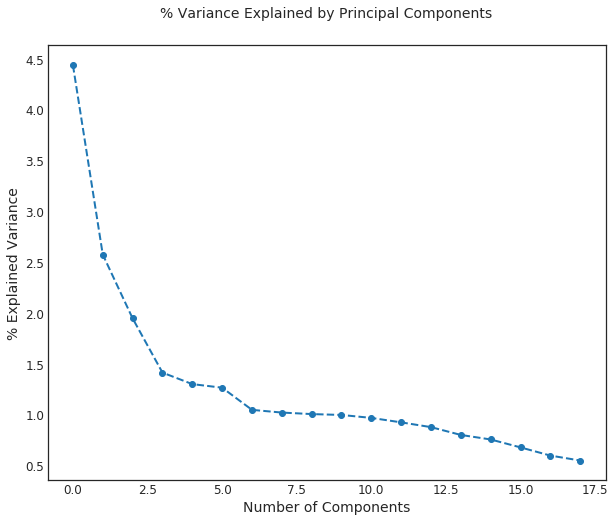

In [39]:
sns.set_style('white')
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca.explained_variance_,'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()


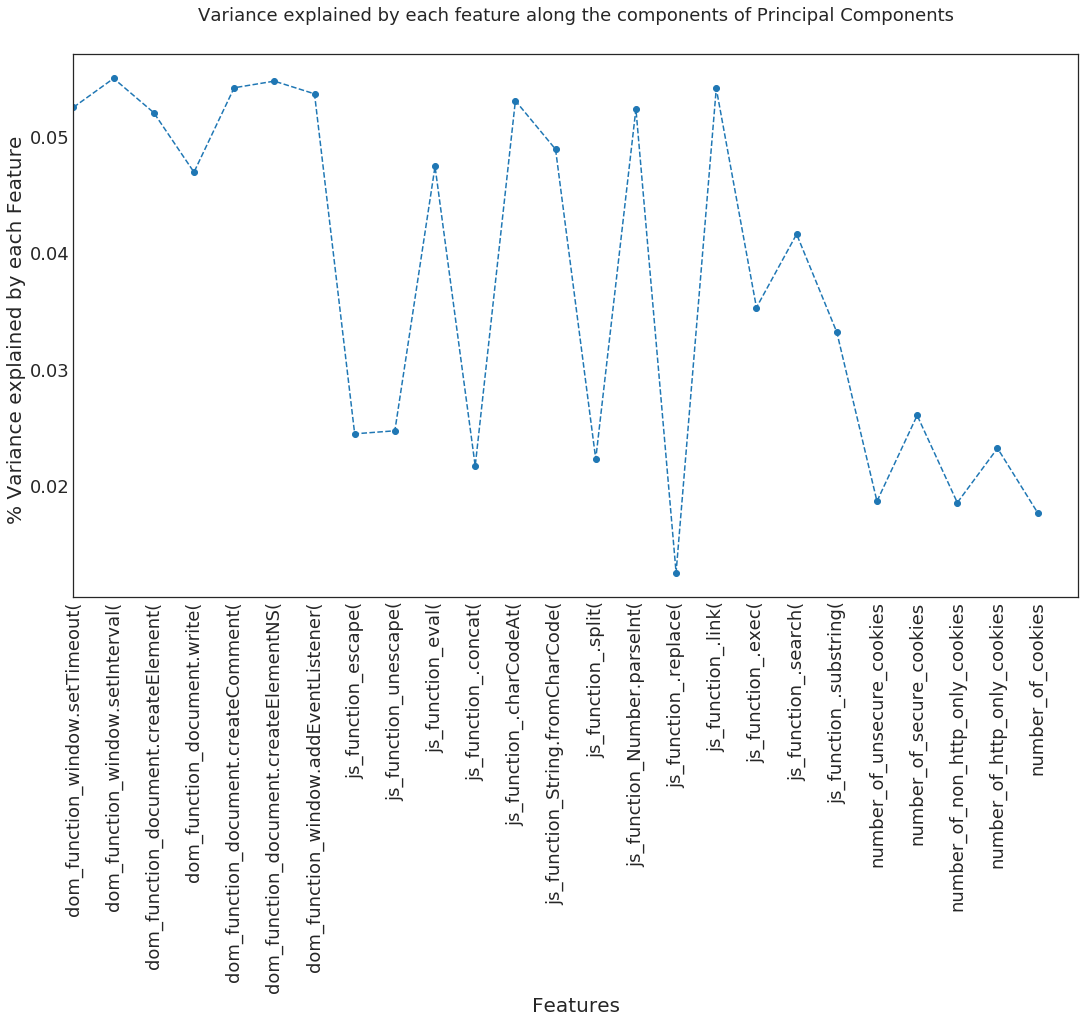

In [40]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o')
plt.legend(loc='lower right')
plt.ylabel('% Variance explained by each Feature ', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, X.shape[1]])
plt.xticks(np.arange(X.shape[1]),feature_name,rotation=90)
plt.title('Variance explained by each feature along the components of Principal Components',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
# plt.savefig('B.jpeg',dpi=1200,bbox_inches = 'tight')
plt.show()

## <a id='3' style="text-decoration : none; color : #000000;"> HTTPS</a>

### <a id='3.A' style="text-decoration : none; color : #000000;">A. Loading Data</a>

In [43]:
df_alex=pd.read_csv('Javascript_alexa_output_final_https.csv',low_memory=False)
df_virus=pd.read_csv('Javascript_malicious_output_final_https.csv',low_memory=False)

df_alex['Malicious']=0
df_virus['Malicious']=1

df=pd.concat([df_alex,df_virus])
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df = df.sample(frac=1,random_state=867).reset_index(drop=True)
df.fillna(value=0,inplace=True)
df=df[df['html_status']=='Success']


### Dropping columns that indicate the html status of domain data collection

df.drop(['html_status','html_status_strerror','html_status_message'],axis=1,inplace=True)
df.set_index(['domain'],inplace=True)


# df.to_csv('Javascript_dom.csv')

df.head()
X=df[['dom_function_window.setTimeout(','dom_function_window.setInterval(','dom_function_document.createElement(',
     'dom_function_document.write(','dom_function_document.createComment(','dom_function_document.createElementNS(',
      'dom_function_window.addEventListener(','js_function_escape(','js_function_unescape(','js_function_eval(','js_function_.concat(','js_function_.charCodeAt(',
   'js_function_String.fromCharCode(','js_function_.split(','js_function_Number.parseInt(','js_function_.replace(',
   'js_function_.link(','js_function_.exec(','js_function_.search(','js_function_.substring(','number_of_unsecure_cookies',
 'number_of_secure_cookies',
 'number_of_non_http_only_cookies',
 'number_of_http_only_cookies',
 'number_of_cookies']]
y=df.Malicious.values
feature_name = X.columns.tolist()
print("Shape after undersampling",df.shape)
df.head()

Shape after undersampling (44476, 407)


,dom_function_document.adoptNode(,dom_function_document.captureEvents(,dom_function_document.caretPositionFromPoint(,dom_function_document.caretRangeFromPoint(,dom_function_document.clear(,dom_function_document.close(,dom_function_document.createAttribute(,dom_function_document.createAttributeNS(,dom_function_document.createCDATASection(,dom_function_document.createComment(,dom_function_document.createDocumentFragment(,dom_function_document.createElement(,dom_function_document.createElementNS(,dom_function_document.createEntityReference(,dom_function_document.createEvent(,dom_function_document.createNodeIterator(,dom_function_document.createProcessingInstruction(,dom_function_document.createRange(,dom_function_document.createTextNode(,dom_function_document.createTouch(,dom_function_document.createTouchList(,dom_function_document.createTreeWalker(,dom_function_document.elementFromPoint(,dom_function_document.elementsFromPoint(,dom_function_document.enableStyleSheetsForSet(,dom_function_document.execCommand(,dom_function_document.exitPointerLock(,dom_function_document.getAnimations(,dom_function_document.getElementById(,dom_function_document.getElementByName(,dom_function_document.getElementsByClassName(,dom_function_document.getElementsByTagName(,dom_function_document.getElementsByTagNameNS(,dom_function_document.getSelection(,dom_function_document.hasFocus(,dom_function_document.importNode(,dom_function_document.normalizeDocument(,dom_function_document.open(,dom_function_document.queryCommandEnabled(,dom_function_document.queryCommandIndeterm(,dom_function_document.queryCommandValue(,dom_function_document.querySelector(,dom_function_document.querySelectorAll(,dom_function_document.releaseCapture(,dom_function_document.releaseEvent(,dom_function_document.routeEvent(,dom_function_document.write(,dom_function_document.writeln(,dom_function_window.addEventListener(,dom_function_window.alert(,dom_function_window.atob(,dom_function_window.back(,dom_function_window.blur(,dom_function_window.btoa(,dom_function_window.cancelAnimationFrame(,dom_function_window.cancelIdleCallback(,dom_function_window.captureEvents(,dom_function_window.clearImmediate(,dom_function_window.clearInterval(,dom_function_window.clearTimeout(,dom_function_window.close(,dom_function_window.confirm(,dom_function_window.createImageBitmap(,dom_function_window.disableExternalCapture(,dom_function_window.dispatchEvent(,dom_function_window.dump(,dom_function_window.enableExternalCapture(,dom_function_window.fetch(,dom_function_window.find(,dom_function_window.focus(,dom_function_window.forward(,dom_function_window.getAttention(,dom_function_window.getAttentionWithCycleCount(,dom_function_window.getComputedStyle(,dom_function_window.getDefaultComputedSyle(,dom_function_window.getSelection(,dom_function_window.home(,dom_function_window.matchMedia(,dom_function_window.maximize(,dom_function_window.minimize(,dom_function_window.moveBy(,dom_function_window.moveTo(,dom_function_window.open(,dom_function_window.openDialog(,dom_function_window.postMessage(,dom_function_window.print(,dom_function_window.prompt(,dom_function_window.releaseEvents(,dom_function_window.removeEventListener(,dom_function_window.requestAnimationFrame(,dom_function_window.requestIdleCallback(,dom_function_window.resizeBy(,dom_function_window.resizeTo(,dom_function_window.restore(,dom_function_window.routeEvent(,dom_function_window.scroll(,dom_function_window.scrollBy(,dom_function_window.scrollByLines(,dom_function_window.scrollByPages(,dom_function_window.scrollTo(,dom_function_window.setCursor(,dom_function_window.setImmediate(,dom_function_window.setInterval(,dom_function_window.setResizable(,dom_function_window.setTimeout(,dom_function_window.sizeToContent(,dom_function_window.stop(,dom_function_window.updateCommands(,js_function_.add(,js_function_.all(,js_function_.allTrue(,js_function_.anchor(,js_function_.apply(,js_function_.big(,js_function_.bind(,js_function_.blink(,js_function_.bold(,js_funct

### <a id='3.C' style="text-decoration : none; color : #000000;"> C. Splitting Training and Test Data For Selected Features </a>

In [44]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
x_train, X_test, y_train, Y_test = train_test_split(X, y,test_size=0.2,random_state=12)

sm = SMOTE(random_state=12, ratio = 1.0)
X_train, Y_train = sm.fit_sample(x_train, y_train)

y=df.Malicious.values
feature_name = X.columns.tolist()

X.shape

The train/test split ratio is 80:20


(44476, 25)

#### C.1 List of features selected

In [45]:
feature_name

['dom_function_window.setTimeout(',
 'dom_function_window.setInterval(',
 'dom_function_document.createElement(',
 'dom_function_document.write(',
 'dom_function_document.createComment(',
 'dom_function_document.createElementNS(',
 'dom_function_window.addEventListener(',
 'js_function_escape(',
 'js_function_unescape(',
 'js_function_eval(',
 'js_function_.concat(',
 'js_function_.charCodeAt(',
 'js_function_String.fromCharCode(',
 'js_function_.split(',
 'js_function_Number.parseInt(',
 'js_function_.replace(',
 'js_function_.link(',
 'js_function_.exec(',
 'js_function_.search(',
 'js_function_.substring(',
 'number_of_unsecure_cookies',
 'number_of_secure_cookies',
 'number_of_non_http_only_cookies',
 'number_of_http_only_cookies',
 'number_of_cookies']

### <a id='3.D' style="text-decoration : none; color : #000000;"> D. Classification using different methods </a>

In [46]:
## Table to store training and test measures
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

#### D.1. Deep Learning

In [47]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.8205254354029322


Predicted  False   True  __all__
Actual                          
False      20252  10237    30489
True         707  29782    30489
__all__    20959  40019    60978

The accuracy of the model on test data is: 0.6963803956834532


Predicted  False  True  __all__
Actual                         
False       4987  2643     7630
True          58  1208     1266
__all__     5045  3851     8896

#### D.2. KNN

In [48]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
acc_train=knn.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",knn.score(X_train,Y_train))
cm_train=get_cm(knn,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,knn.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(knn,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,knn.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[1]= ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[1] = ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8197546656171079


Predicted  False   True  __all__
Actual                          
False      20795   9694    30489
True        1297  29192    30489
__all__    22092  38886    60978

The accuracy of the model on test data is: 0.7079586330935251


Predicted  False  True  __all__
Actual                         
False       5116  2514     7630
True          84  1182     1266
__all__     5200  3696     8896

#### D.3. Logistics

In [49]:
logistic=LogisticRegression()
logistic.fit(X_train,Y_train)
acc_train=logistic.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",logistic.score(X_train,Y_train))
cm_train=get_cm(logistic,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,logistic.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(logistic,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,logistic.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8028141296861163


Predicted  False   True  __all__
Actual                          
False      19556  10933    30489
True        1091  29398    30489
__all__    20647  40331    60978

The accuracy of the model on test data is: 0.6815422661870504


Predicted  False  True  __all__
Actual                         
False       4856  2774     7630
True          59  1207     1266
__all__     4915  3981     8896

#### D.4. Random Forest Classifier

In [50]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8268719866181246


Predicted  False   True  __all__
Actual                          
False      20323  10166    30489
True         391  30098    30489
__all__    20714  40264    60978

The accuracy of the model on test data is: 0.6981789568345323


Predicted  False  True  __all__
Actual                         
False       5002  2628     7630
True          57  1209     1266
__all__     5059  3837     8896

#### D.5. AdaBoost Classifier

In [51]:
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
acc_train=ada.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ada.score(X_train,Y_train))
cm_train=get_cm(ada,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ada.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ada,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ada.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8112597986158943


Predicted  False   True  __all__
Actual                          
False      20662   9827    30489
True        1682  28807    30489
__all__    22344  38634    60978

The accuracy of the model on test data is: 0.7072841726618705


Predicted  False  True  __all__
Actual                         
False       5113  2517     7630
True          87  1179     1266
__all__     5200  3696     8896

#### D.6. GradientBoosting Classifier

In [52]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
acc_train=gbc.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",gbc.score(X_train,Y_train))
cm_train=get_cm(gbc,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,gbc.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(gbc,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,gbc.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.821001016760143


Predicted  False   True  __all__
Actual                          
False      20507   9982    30489
True         933  29556    30489
__all__    21440  39538    60978

The accuracy of the model on test data is: 0.7022257194244604


Predicted  False  True  __all__
Actual                         
False       5053  2577     7630
True          72  1194     1266
__all__     5125  3771     8896

#### D.7. Extra Tree Classifier

In [53]:
ext_tree=ExtraTreesClassifier()
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8270359801895766


Predicted  False   True  __all__
Actual                          
False      20334  10155    30489
True         392  30097    30489
__all__    20726  40252    60978

The accuracy of the model on test data is: 0.6991906474820144


Predicted  False  True  __all__
Actual                         
False       5011  2619     7630
True          57  1209     1266
__all__     5068  3828     8896

#### D.8. Bagging Classifier

In [54]:
bagging=BaggingClassifier()
bagging.fit(X_train,Y_train)
acc_train=bagging.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",bagging.score(X_train,Y_train))
cm_train=get_cm(bagging,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,bagging.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(bagging,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,bagging.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8267407917609629


Predicted  False   True  __all__
Actual                          
False      20328  10161    30489
True         404  30085    30489
__all__    20732  40246    60978

The accuracy of the model on test data is: 0.6986285971223022


Predicted  False  True  __all__
Actual                         
False       5006  2624     7630
True          57  1209     1266
__all__     5063  3833     8896

#### D.9. Voting Classifier

In [55]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The accuracy of the model on training data is :",acc_train)
display(cm_train)
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,eclf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is : 0.823214929974745


Predicted  False   True  __all__
Actual                          
False      20899   9590    30489
True        1190  29299    30489
__all__    22089  38889    60978

The accuracy of the model on test data is: 0.7122302158273381


Predicted  False  True  __all__
Actual                         
False       5156  2474     7630
True          86  1180     1266
__all__     5242  3654     8896

### <a id='3.E' style="text-decoration : none; color : #000000;"> E. Results </a>

In [56]:
table_80_50_train['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']
table_80_50_test['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_test)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural Network-1,0.820525,29782.0,20252.0,10237.0,707.0,0.335760,0.023189
KNeighborsClassifier,0.819755,29192.0,20795.0,9694.0,1297.0,0.317951,0.042540
LogisticRegression,0.802814,29398.0,19556.0,10933.0,1091.0,0.358588,0.035783
RandomForestClassifier,0.826872,30098.0,20323.0,10166.0,391.0,0.333432,0.012824
AdaBoostClassifier,0.811260,28807.0,20662.0,9827.0,1682.0,0.322313,0.055167
GradientBoostingClassifier,0.821001,29556.0,20507.0,9982.0,933.0,0.327397,0.030601
ExtraTreeClassifier,0.827036,30097.0,20334.0,10155.0,392.0,0.333071,0.012857
BaggingClassifier,0.826741,30085.0,20328.0,10161.0,404.0,0.333268,0.013251
VotingClassifier,0.823215,29299.0,20899.0,9590.0,1190.0,0.314540,0.039030


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural Network-1,0.696380,1208.0,4987.0,2643.0,58.0,0.346396,0.045814,0.803895
KNeighborsClassifier,0.707959,1182.0,5116.0,2514.0,84.0,0.329489,0.066351,0.802080
LogisticRegression,0.681542,1207.0,4856.0,2774.0,59.0,0.363565,0.046603,0.794916
RandomForestClassifier,0.698179,1209.0,5002.0,2628.0,57.0,0.344430,0.045024,0.805273
AdaBoostClassifier,0.707284,1179.0,5113.0,2517.0,87.0,0.329882,0.068720,0.800699
GradientBoostingClassifier,0.702226,1194.0,5053.0,2577.0,72.0,0.337746,0.056872,0.802691
ExtraTreeClassifier,0.699191,1209.0,5011.0,2619.0,57.0,0.343250,0.045024,0.805863
BaggingClassifier,0.698629,1209.0,5006.0,2624.0,57.0,0.343906,0.045024,0.805535
VotingClassifier,0.712230,1180.0,5156.0,2474.0,86.0,0.324246,0.067930,0.803912


## <a id='4' style="text-decoration : none; color : #000000;">4. HTTPS with PCA</a>

#### <a id='4.A' style="text-decoration : none; color : #000000;"> A. Classification using different methods</a>

In [57]:
## Table to store training and test measures
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

In [58]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=18,random_state=0)
X_pca=pca.fit_transform(scaled_X)
print(sum(pca.explained_variance_ratio_))
print("The train/test split ratio is 80:20")
x_train, X_test, y_train, Y_test = train_test_split(X_pca, y,test_size=0.2,random_state=12)

sm = SMOTE(random_state=12, ratio = 1.0)
X_train, Y_train = sm.fit_sample(x_train, y_train)

y=df.Malicious.values
feature_name = X.columns.tolist()


X_pca.shape

0.9385220924121574
The train/test split ratio is 80:20


(44476, 18)

#### A.1. Deep Learning

In [59]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X_train.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.8177211453311031


Predicted  False   True  __all__
Actual                          
False      20263  10226    30489
True         889  29600    30489
__all__    21152  39826    60978

The accuracy of the model on test data is: 0.6977293165467626


Predicted  False  True  __all__
Actual                         
False       5000  2630     7630
True          59  1207     1266
__all__     5059  3837     8896

#### A.2. KNN

In [60]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
acc_train=knn.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",knn.score(X_train,Y_train))
cm_train=get_cm(knn,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,knn.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(knn,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,knn.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[1]= ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[1] = ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8206566302600938


Predicted  False   True  __all__
Actual                          
False      20373  10116    30489
True         820  29669    30489
__all__    21193  39785    60978

The accuracy of the model on test data is: 0.6988534172661871


Predicted  False  True  __all__
Actual                         
False       5018  2612     7630
True          67  1199     1266
__all__     5085  3811     8896

#### A.3. Logistics

In [61]:
logistic=LogisticRegression()
logistic.fit(X_train,Y_train)
acc_train=logistic.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",logistic.score(X_train,Y_train))
cm_train=get_cm(logistic,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,logistic.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(logistic,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,logistic.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8029945226147135


Predicted  False   True  __all__
Actual                          
False      19543  10946    30489
True        1067  29422    30489
__all__    20610  40368    60978

The accuracy of the model on test data is: 0.6813174460431655


Predicted  False  True  __all__
Actual                         
False       4853  2777     7630
True          58  1208     1266
__all__     4911  3985     8896

#### A.4. Random Forest Classifier

In [62]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8265931975466562


Predicted  False   True  __all__
Actual                          
False      20321  10168    30489
True         406  30083    30489
__all__    20727  40251    60978

The accuracy of the model on test data is: 0.6986285971223022


Predicted  False  True  __all__
Actual                         
False       5006  2624     7630
True          57  1209     1266
__all__     5063  3833     8896

#### A.5. AdaBoost Classifier

In [63]:
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
acc_train=ada.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ada.score(X_train,Y_train))
cm_train=get_cm(ada,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ada.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ada,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ada.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8123913542589131


Predicted  False   True  __all__
Actual                          
False      20153  10336    30489
True        1104  29385    30489
__all__    21257  39721    60978

The accuracy of the model on test data is: 0.6960431654676259


Predicted  False  True  __all__
Actual                         
False       4988  2642     7630
True          62  1204     1266
__all__     5050  3846     8896

#### A.6. GradientBoosting Classifier

In [64]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
acc_train=gbc.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",gbc.score(X_train,Y_train))
cm_train=get_cm(gbc,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,gbc.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(gbc,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,gbc.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8181475286168782


Predicted  False   True  __all__
Actual                          
False      20335  10154    30489
True         935  29554    30489
__all__    21270  39708    60978

The accuracy of the model on test data is: 0.6995278776978417


Predicted  False  True  __all__
Actual                         
False       5018  2612     7630
True          61  1205     1266
__all__     5079  3817     8896

#### A.7. Extra Tree Classifier

In [65]:
ext_tree=ExtraTreesClassifier()
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8270359801895766


Predicted  False   True  __all__
Actual                          
False      20334  10155    30489
True         392  30097    30489
__all__    20726  40252    60978

The accuracy of the model on test data is: 0.6989658273381295


Predicted  False  True  __all__
Actual                         
False       5009  2621     7630
True          57  1209     1266
__all__     5066  3830     8896

#### A.8. Bagging Classifier

In [66]:
bagging=BaggingClassifier()
bagging.fit(X_train,Y_train)
acc_train=bagging.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",bagging.score(X_train,Y_train))
cm_train=get_cm(bagging,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,bagging.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(bagging,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,bagging.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8264784020466398


Predicted  False   True  __all__
Actual                          
False      20327  10162    30489
True         419  30070    30489
__all__    20746  40232    60978

The accuracy of the model on test data is: 0.6989658273381295


Predicted  False  True  __all__
Actual                         
False       5008  2622     7630
True          56  1210     1266
__all__     5064  3832     8896

#### A.9. Voting Classifier

In [67]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The accuracy of the model on training data is :",acc_train)
display(cm_train)
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,eclf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is : 0.8254616419036374


Predicted  False   True  __all__
Actual                          
False      20331  10158    30489
True         485  30004    30489
__all__    20816  40162    60978

The accuracy of the model on test data is: 0.6993030575539568


Predicted  False  True  __all__
Actual                         
False       5012  2618     7630
True          57  1209     1266
__all__     5069  3827     8896

### <a id='4.B' style="text-decoration : none; color : #000000;"> B. Results </a>

In [68]:
table_80_50_train['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']
table_80_50_test['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_test)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural Network-1,0.817721,29600.0,20263.0,10226.0,889.0,0.335400,0.029158
KNeighborsClassifier,0.820657,29669.0,20373.0,10116.0,820.0,0.331792,0.026895
LogisticRegression,0.802995,29422.0,19543.0,10946.0,1067.0,0.359015,0.034996
RandomForestClassifier,0.826593,30083.0,20321.0,10168.0,406.0,0.333497,0.013316
AdaBoostClassifier,0.812391,29385.0,20153.0,10336.0,1104.0,0.339008,0.036210
GradientBoostingClassifier,0.818148,29554.0,20335.0,10154.0,935.0,0.333038,0.030667
ExtraTreeClassifier,0.827036,30097.0,20334.0,10155.0,392.0,0.333071,0.012857
BaggingClassifier,0.826478,30070.0,20327.0,10162.0,419.0,0.333301,0.013743
VotingClassifier,0.825462,30004.0,20331.0,10158.0,485.0,0.333169,0.015907


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural Network-1,0.697729,1207.0,5000.0,2630.0,59.0,0.344692,0.046603,0.804352
KNeighborsClassifier,0.698853,1199.0,5018.0,2612.0,67.0,0.342333,0.052923,0.802372
LogisticRegression,0.681317,1208.0,4853.0,2777.0,58.0,0.363958,0.045814,0.795114
RandomForestClassifier,0.698629,1209.0,5006.0,2624.0,57.0,0.343906,0.045024,0.805535
AdaBoostClassifier,0.696043,1204.0,4988.0,2642.0,62.0,0.346265,0.048973,0.802381
GradientBoostingClassifier,0.699528,1205.0,5018.0,2612.0,61.0,0.342333,0.048183,0.804742
ExtraTreeClassifier,0.698966,1209.0,5009.0,2621.0,57.0,0.343512,0.045024,0.805732
BaggingClassifier,0.698966,1210.0,5008.0,2622.0,56.0,0.343644,0.044234,0.806061
VotingClassifier,0.699303,1209.0,5012.0,2618.0,57.0,0.343119,0.045024,0.805929


### <a id='4.C' style="text-decoration : none; color : #000000;"> C. % variance eplained by selected features </a> 

In [69]:
pca_inv_data = pca.components_
lst=[]
lst.append((np.square(pca_inv_data.std(axis=0)),X.columns))
pca_df=pd.DataFrame(np.square(pca_inv_data.std(axis=0)))
pca_df['features']=X.columns
pca_df.columns=['% Variance explained by each feature','Features']
pca_df['% Variance explained by each feature']=pca_df['% Variance explained by each feature']
pca_df.sort_values(by='% Variance explained by each feature',ascending=False,inplace=True)
pca_df

,% Variance explained by each feature,Features
16,0.055238,js_function_.link(
14,0.054428,js_function_Number.parseInt(
1,0.054372,dom_function_window.setInterval(
0,0.054340,dom_function_window.setTimeout(
12,0.054220,js_function_String.fromCharCode(
2,0.054003,dom_function_document.createElement(
18,0.052976,js_function_.search(
9,0.050597,js_function_eval(
19,0.050202,js_function_.substring(
11,0.050149,js_function_.charCodeAt(


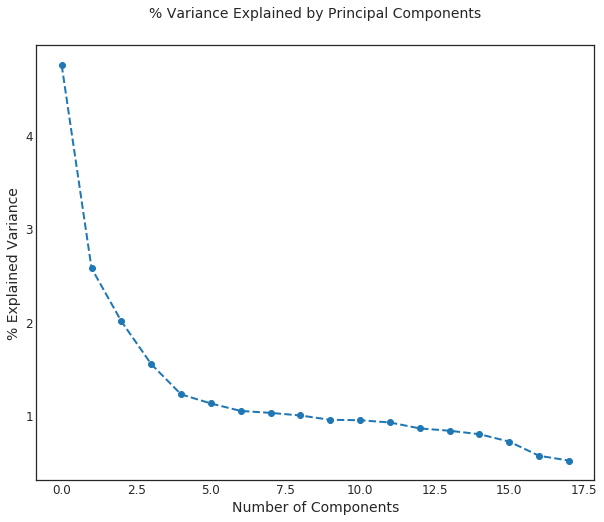

In [70]:
sns.set_style('white')
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca.explained_variance_,'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()


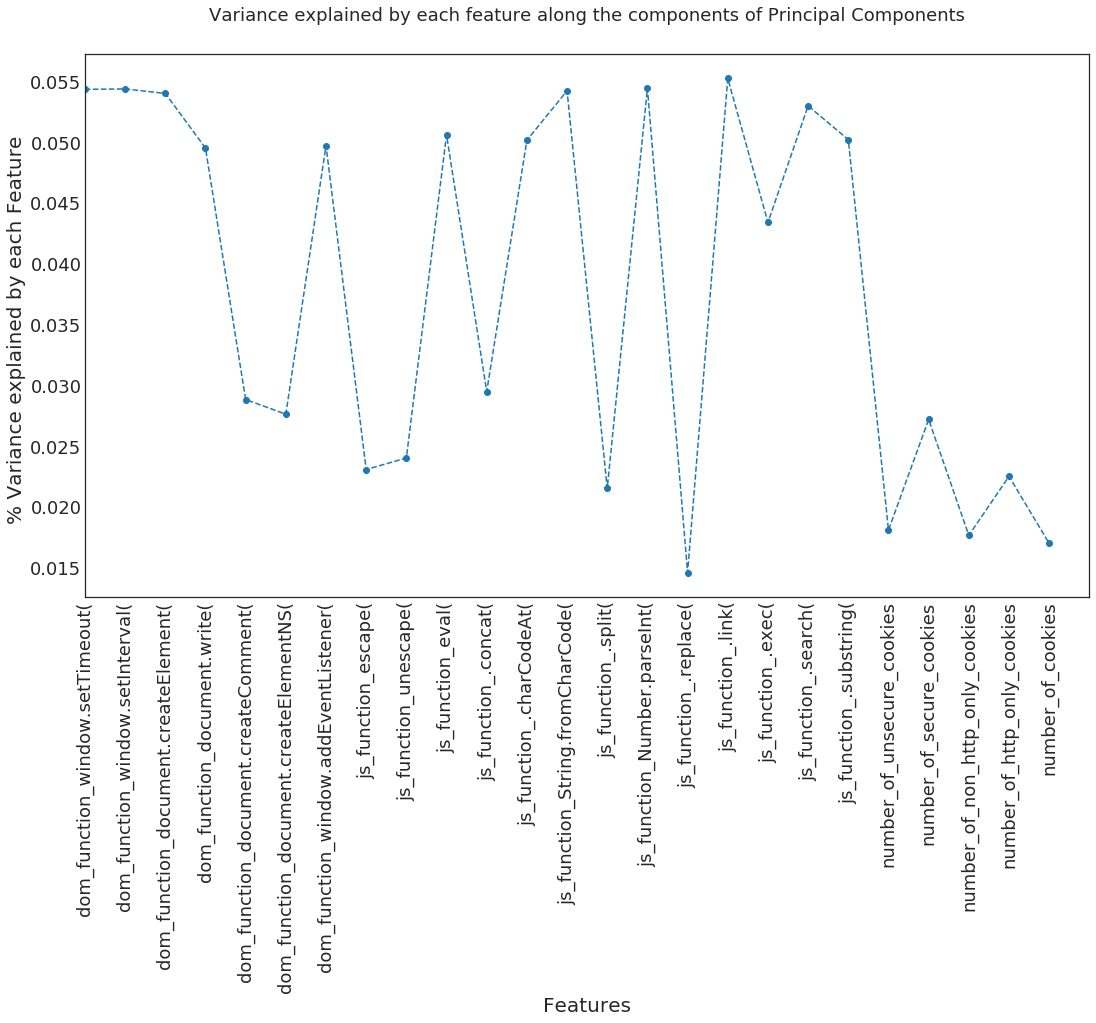

In [71]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o')
plt.legend(loc='lower right')
plt.ylabel('% Variance explained by each Feature ', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, X.shape[1]])
plt.xticks(np.arange(X.shape[1]),feature_name,rotation=90)
plt.title('Variance explained by each feature along the components of Principal Components',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
# plt.savefig('B.jpeg',dpi=1200,bbox_inches = 'tight')
plt.show()

In [73]:
### Original Creator : Darshan Bhansali
### HTML code to hide the input cells 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')